<h1><font color="#113D68" size=5>TINTOlib: Converting Tidy Data into Image for Classification with 2-Dimensional Convolutional Neural Networks</font></h1>



<h1><font color="#113D68" size=6>How to read TINTO images</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Luis Orozco-Barbosa</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
    * [1.2. Citation](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Read images](#section31)
    * [3.2. Data Curation](#section32)
* [4. Pre-modelling phase](#section4)
    * [4.1. Resize images](#section41)
    * [4.2. Iteradores](#section42)
* [5. Modelling with CNN](#section5)
    * [5.1. CNN](#section51)
    * [5.2. Compile and fit](#section52)
    * [5.3. Results](#section53)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple Hybrid Neural Network (HyNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<figure><center>
  <img src="../../Images/HyNN.png" width="750" height="400" alt="Gráfica">
  <figcaption><blockquote>CNN architecture with synthetic images. Extract from <a href="https://doi.org/10.1016/j.inffus.2022.10.011">A novel deep learning approach using blurring image techniques for Bluetooth-based indoor localisation</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [Information Fusion Journal](https://doi.org/10.1016/j.inffus.2022.10.011)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTO in [GitHub](https://github.com/oeg-upm/TINTO)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTO offers the opportunity to convert tidy data into images through the representation of characteristic pixels by implementing two dimensional reduction algorithms: PCA and _t_-SNE. Our proposal also includes a blurring technique, which adds more ordered information to the image and can improve the classification task in CNNs.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data must be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTO does not accept data in string or any other non-numeric format.
- Two dimensionality reduction algorithms are used in image creation, **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)** and **[*t*-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)** from the Scikit-learn Python library.
- The synthetic images to be created will be in black and white, i.e. in 1 channel.
- The synthetic image **dimensions** can be set as a parameter when creating them.
- The synthetic images can be created using **characteristic pixels** or **blurring** painting technique (expressing an overlap of pixels as the **maximum** or **average**).
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf
import seaborn as sns
from PIL import Image


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, concatenate

from torchmetrics import MeanAbsolutePercentageError
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

import pytorch_lightning as pl
from pytorch_lightning.loggers  import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping


from imblearn.over_sampling import RandomOverSampler

#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination
import TINTOlib.utils

/Users/manwest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

The first thing to do is to read all the images created by TINTO. TINTO creates a folder which contains subfolders corresponding to each target that has the problem. Each image corresponds to a sample of the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Create images with TINTOlib</font>

In [5]:
# Select the model and the parameters
problem_type = "supervised"
size = 20
image_model = TINTO(problem=problem_type,verbose=True,blur=True,pixels=size,)
# image_model = REFINED(problem=problem_type, random_seed=SEED, zoom=1, n_processors=8)
# image_model = IGTD(problem=problem_type, scale=[image_size,image_size], fea_dist_method='Euclidean', image_dist_method='Euclidean', error='abs', max_step=30000, val_step=300, random_seed=SEED)
# image_model = BarGraph(problem=problem_type, zoom=2)
# image_model = DistanceMatrix(problem=problem_type, zoom=2)
# image_model = Combination(problem=problem_type, zoom=2)
# image_model = SuperTML(problem=problem_type, pixels=pixel, font_size=30, feature_importance=True, random_seed=SEED)
# image_model = FeatureWrap(problem = problem_type, bins=10)

# Define the dataset path and the folder where the images will be saved
dataset_path = "../../Data/Multiclass/iris.csv"
images_folder = "../images_iris_TINTO"

Normalize dataset

In [6]:
df = pd.read_csv(dataset_path)
df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [7]:
# Select all the attributes to normalize
columns_to_normalize = df.columns[:-1]


# Normalize between 0 and 1
df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Combine the attributes and the label
df_normalized = pd.concat([df_normalized, df[df.columns[-1]]], axis=1)

df_normalized.head(2)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1


In [8]:
import os

# Generate the images if the folder does not exist
if not os.path.exists(images_folder):
    #Generate thet images
    image_model.generateImages(df, images_folder)
else:
    print("The images are already generated")

img_paths = os.path.join(images_folder,problem_type+".csv")

print(img_paths)

Loaded data
Selected algorithm: PCA
The folder was created ../images_iris_TINTO...
Created  1 / 150
Created  2 / 150
Created  3 / 150
Created  4 / 150
Created  5 / 150
Created  6 / 150
Created  7 / 150
Created  8 / 150
Created  9 / 150
Created  10 / 150
Created  11 / 150
Created  12 / 150
Created  13 / 150
Created  14 / 150
Created  15 / 150
Created  16 / 150
Created  17 / 150
Created  18 / 150
Created  19 / 150
Created  20 / 150
Created  21 / 150
Created  22 / 150
Created  23 / 150
Created  24 / 150
Created  25 / 150
Created  26 / 150
Created  27 / 150
Created  28 / 150
Created  29 / 150
Created  30 / 150
Created  31 / 150
Created  32 / 150
Created  33 / 150
Created  34 / 150
Created  35 / 150
Created  36 / 150
Created  37 / 150
Created  38 / 150
Created  39 / 150
Created  40 / 150
Created  41 / 150
Created  42 / 150
Created  43 / 150
Created  44 / 150
Created  45 / 150
Created  46 / 150
Created  47 / 150
Created  48 / 150
Created  49 / 150
Created  50 / 150
Created  51 / 150
Created 

<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Data Analysis</font>

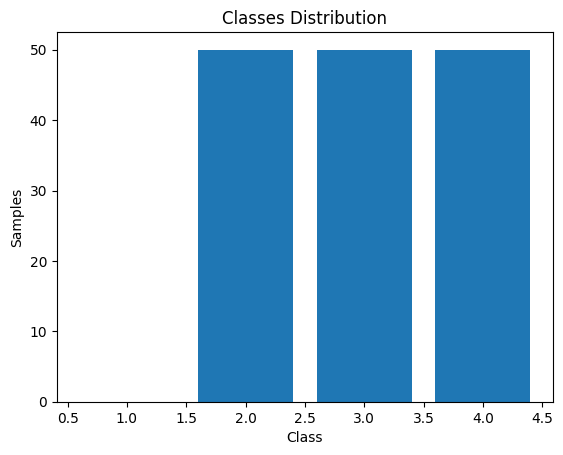

In [9]:
target_values = df_normalized.iloc[:,-1]
class_counts = np.bincount(target_values)
class_labels = np.arange(1, len(class_counts) + 1)

# Create the bar plot
plt.bar(class_labels, class_counts)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Samples')
plt.title('Classes Distribution')

# Display the plot
plt.show()

<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Read images</font>

In [10]:
imgs = pd.read_csv(img_paths)

#imgs["images"]= images_folder + "\\" + imgs["images"]
imgs["images"]= images_folder + "/" + imgs["images"]

combined_dataset = pd.concat([imgs,df_normalized[columns_to_normalize]],axis=1)
combined_dataset

df_x = combined_dataset.drop("class",axis=1)
df_y = combined_dataset["class"].replace(-1, 0)

df_x.head(2)

,images,SepalLength,SepalWidth,PetalLength,PetalWidth
0,../images_iris_TINTO/01/000000.png,0.222222,0.625000,0.067797,0.041667
1,../images_iris_TINTO/01/000001.png,0.166667,0.416667,0.067797,0.041667


In [11]:
df_y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: class, Length: 150, dtype: int64

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

In [12]:
import cv2
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state = 123,stratify=df_y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123, stratify=y_val)

X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])

"""X_train_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_train["images"]])
X_val_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_val["images"]])
X_test_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_test["images"]])"""

n_class = df['Species'].value_counts().count()
img_shape = X_train_img[0].shape
attributes = len(X_train_num.columns)
print("Image shape",X_train_img[0].shape)
print("Attributes",attributes)
print("Classes",n_class)


Image shape (20, 20, 3)
Attributes 4
Classes 3


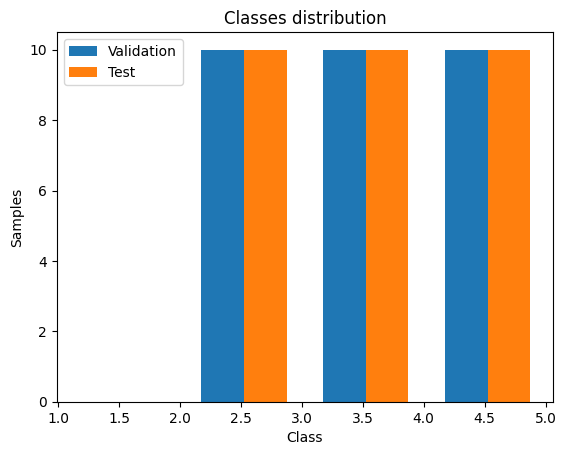

In [13]:
#SPLITS CLASS DISTRIBUTION

train_class_counts = np.bincount(y_train)
val_class_counts = np.bincount(y_val)
test_class_counts = np.bincount(y_test)

width = 0.35 
#plt.bar(class_labels, train_class_counts, width, label='Train')
plt.bar(class_labels + width, val_class_counts, width, label='Validation')
plt.bar(class_labels + width*2, test_class_counts, width, label='Test')

plt.xlabel('Class')
plt.ylabel('Samples')
plt.title('Classes distribution')
#plt.xticks(class_labels + width / 2, class_labels)
plt.legend()

# Mostrar el gráfico
plt.show()


In [14]:
#ONE HOT ENCODING FOR MULTICLASS PROBLEMS
from tensorflow.keras.utils import to_categorical

# Adjusting class indices to start from 0 since to_categorical expects classes indexed from 0 to n_class-1,
# while original indices range from 1 to n_class.
y_train_oh =  to_categorical(y_train-1,n_class)
y_val_oh = to_categorical(y_val-1,n_class)
y_test_oh = to_categorical(y_test-1,n_class)

In [15]:
y_val

144    3
125    3
100    3
43     1
91     2
72     2
17     1
61     2
63     2
116    3
51     2
32     1
14     1
4      1
38     1
146    3
37     1
129    3
19     1
101    3
56     2
16     1
105    3
70     2
138    3
80     2
74     2
67     2
45     1
117    3
Name: class, dtype: int64

In [16]:
y_val_oh[0]

array([0., 0., 1.])

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modeling hybrid network</font>

In [17]:
dropout = 0.3

In [29]:
ff_inputs = Input(shape = (attributes,))

# * START BRANCH 1

mlp_1 = Dense(256, activation='relu')(ff_inputs)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(128, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(64, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(32, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(16, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

ff_model = Model(inputs = ff_inputs, outputs = mlp_1)

In [30]:
input_shape = Input(shape=img_shape)
# CNN branch 1
tower_1 = Conv2D(16, (3,3), activation='relu',padding="same")(input_shape)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)

tower_1 = Conv2D(32, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = Activation('relu')(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = Activation('relu')(tower_1)

#Flatten
merged = Flatten()(tower_1)

#Dense layers
out = Dense(128, activation='relu')(merged)
out = Dense(64, activation='relu')(out)
out = Dense(32, activation='relu')(out)

cnn_model = Model(input_shape, out)

---
<a id="section51"></a>
# <font color="#004D7F" size=5> 5.1. Concatenate branches</font>

Finally, we need to fuse the CNN and MLP branches. In this case, we use a direct concatenation of the output from the CNN branch with the output from the MLP branch, feeding them into a final fully connected neural network (FFNN) that will produce the predictions.

In [31]:
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(32, activation="relu")(combinedInput)
#x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(n_class, activation="softmax")(x)
model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

In [32]:
METRICS = [
    #tf.keras.metrics.TruePositives(name = 'tp'),
    #tf.keras.metrics.FalsePositives(name = 'fp'),
    #tf.keras.metrics.TrueNegatives(name = 'tn'),
    #tf.keras.metrics.FalseNegatives(name = 'fn'), 
    tf.keras.metrics.CategoricalAccuracy(name ='accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall'),
    tf.keras.metrics.AUC(name = 'auc'),
]

In [34]:
#HYPERPARAMETERS
opt = Adam(learning_rate=1e-3)
model.compile(
    loss="categorical_crossentropy", 
    optimizer=opt,
    metrics = METRICS
)
epochs = 500

In [35]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode="max" ,restore_best_weights=True)

In [36]:
model_history=model.fit(
    x=[X_train_num, X_train_img/255], y=y_train_oh,
    validation_data=([X_val_num, X_val_img/255], y_val_oh),
    epochs=epochs , 
    batch_size=8,
    #steps_per_epoch = X_train_num.shape[0]//batch_size,
    #validation_steps = X_train_num.shape[0]//batch_size,
    #callbacks=[early_stopping]
)

Epoch 1/500


2024-10-28 09:52:02.449505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.3300 - auc: 0.4475 - loss: 1.4156 - precision: 0.2961 - recall: 0.1750 - val_accuracy: 0.3333 - val_auc: 0.5194 - val_loss: 1.1116 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.2927 - auc: 0.4903 - loss: 1.3282 - precision: 0.3333 - recall: 0.1842 - val_accuracy: 0.3333 - val_auc: 0.4778 - val_loss: 1.0997 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4787 - auc: 0.6338 - loss: 1.0964 - precision: 0.5166 - recall: 0.2664 - val_accuracy: 0.3333 - val_auc: 0.6286 - val_loss: 1.0948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5488 - auc: 0.6967 - loss: 1.0206 - precision: 0.6679 - recall: 0.2826 - val_accuracy: 0.3333 - val_auc: 0.5039 - val_loss: 1.0960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50

In [37]:
print(model_history.history.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

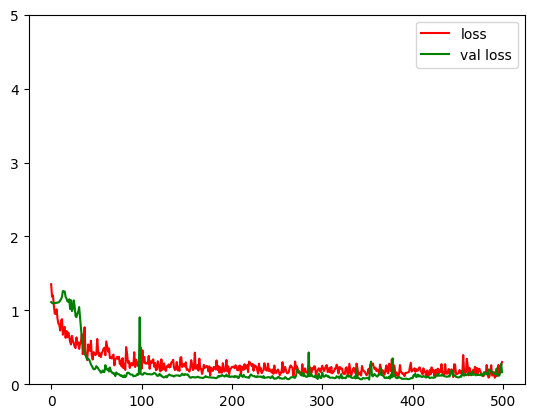

In [38]:
#print(model_history.history['loss'])
plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.ylim(0,5)
plt.show()

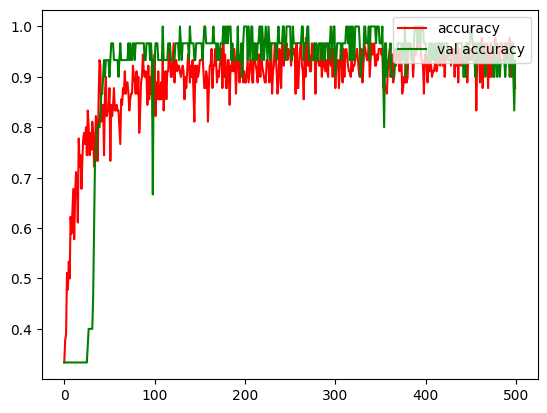

In [39]:
plt.plot(model_history.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [40]:
prediction = model.predict([X_test_num,X_test_img/255],)
real_values= y_test.values-1
predicted_classes = np.argmax(prediction, axis = 1)

result = [list(t) for t in zip(predicted_classes, real_values)]
#print(np.round(prediction))
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
[[0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [2, 2], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [2, 2], [1, 1], [2, 2], [2, 2], [0, 0], [1, 2], [2, 2], [2, 2], [0, 0], [0, 0], [0, 0], [2, 2], [1, 1], [2, 2], [0, 0], [2, 2], [2, 1]]


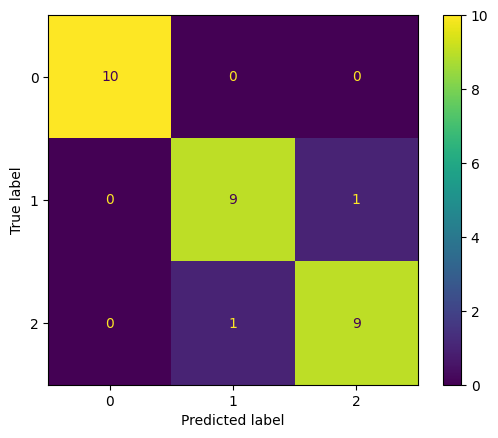

In [41]:
from sklearn.metrics import confusion_matrix
true_classes = real_values

cm = confusion_matrix(true_classes, predicted_classes)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()




In [42]:
report = sklearn.metrics.classification_report(true_classes, 
                                               predicted_classes)
print(report) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [43]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score, recall_score

test_accuracy = accuracy_score(true_classes, predicted_classes)
#test_auc = roc_auc_score(true_classes, predicted_classes)
#test_precision = precision_score(true_classes, predicted_classes)
#test_recall = recall_score(true_classes, predicted_classes)

print("Test accuracy:",test_accuracy)
#print("Test AUC:",test_auc)
#print("Test precision:",test_precision)
#print("Test recall:",test_recall)

Test accuracy: 0.9333333333333333


In [44]:
train_accuracy = model_history.history["accuracy"][-1]
train_auc = model_history.history["auc"][-1]
train_precision = model_history.history["precision"][-1]
train_recall = model_history.history["recall"][-1]
train_loss = model_history.history["loss"][-1]

print("Train accuracy:",train_accuracy)
print("Train AUC:",train_auc)
print("Train precision:",train_precision)
print("Train recall:",train_recall)
print("Train loss:",train_loss)

Train accuracy: 0.8777777552604675
Train AUC: 0.9768210649490356
Train precision: 0.8777777552604675
Train recall: 0.8777777552604675
Train loss: 0.30134689807891846


In [45]:
validation_accuracy = model_history.history["val_accuracy"][-1]
validation_auc = model_history.history["val_auc"][-1]
validation_precision = model_history.history["val_precision"][-1]
validation_recall = model_history.history["val_recall"][-1]
validation_loss = model_history.history["val_loss"][-1]

print("Validation accuracy:",validation_accuracy)
print("Validation AUC:",validation_auc)
print("Validation precision:",validation_precision)
print("Validation recall:",validation_recall)
print("Validation loss:",validation_loss)

Validation accuracy: 0.9333333373069763
Validation AUC: 0.9922223091125488
Validation precision: 0.9333333373069763
Validation recall: 0.9333333373069763
Validation loss: 0.16311724483966827
